IMPORTING LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from scipy import stats


LOADING DATASET

In [ ]:
import zipfile
import pandas as pd

# Path to your zip file
zip_file_path = '/content/archive (6).zip'

# Directory where the contents will be extracted
extract_dir = 'extracted_files'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

csv_file_path = f'{extract_dir}/Crimes_-_2001_to_Present.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
print(df.head())

df.columns

         ID Case Number                    Date                  Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870   
2  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
3  10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE  0560   

  Primary Type              Description Location Description  Arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKING              CTA BUS   False   
2        THEFT                OVER $500            RESIDENCE   False   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK    True   
4      ASSAULT                   SIMPLE            APARTMENT   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0      

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

DATA CLEANING

In [ ]:
from sklearn.impute import SimpleImputer
from scipy import stats
import numpy as np

# Handling Missing Values
missing_values_count = df.isnull().sum()
print("Missing values in each column:\n", missing_values_count)

# Impute missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Impute missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Outlier Identification and Management
# Using z-score
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers = (z_scores > 3).all(axis=1)
df_cleaned = df[~outliers]

# Inconsistency Resolution
# Correct format inconsistencies and spelling errors if any
df_cleaned['Primary Type'] = df_cleaned['Primary Type'].str.lower()

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
df_cleaned['Primary Type'] = label_encoder.fit_transform(df_cleaned['Primary Type'])




Missing values in each column:
 ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64


DATA TRANSFORMATION

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

# Normalization and Standardization
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


# Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
principal_components = pca.fit_transform(df_cleaned[numerical_cols])
df_pca = pd.DataFrame(principal_components)


In [ ]:
print("Columns after preprocessing:\n", df_cleaned.columns)

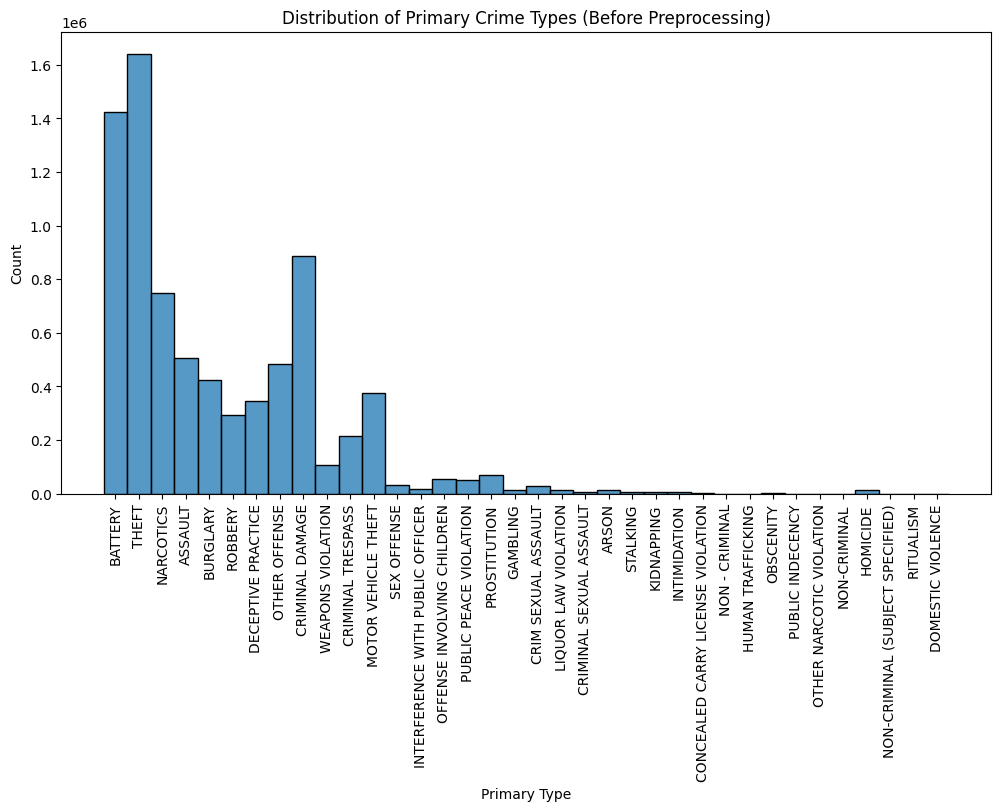

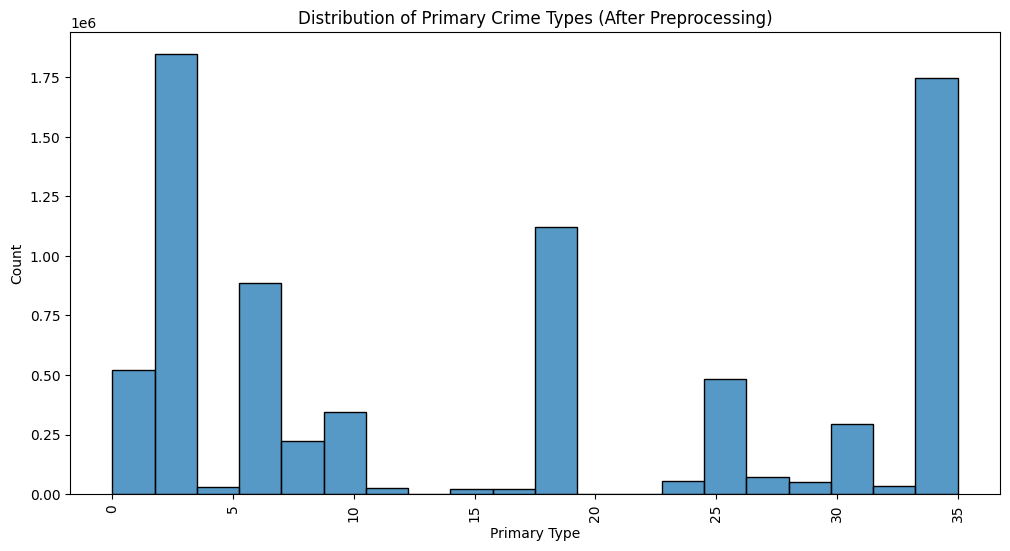

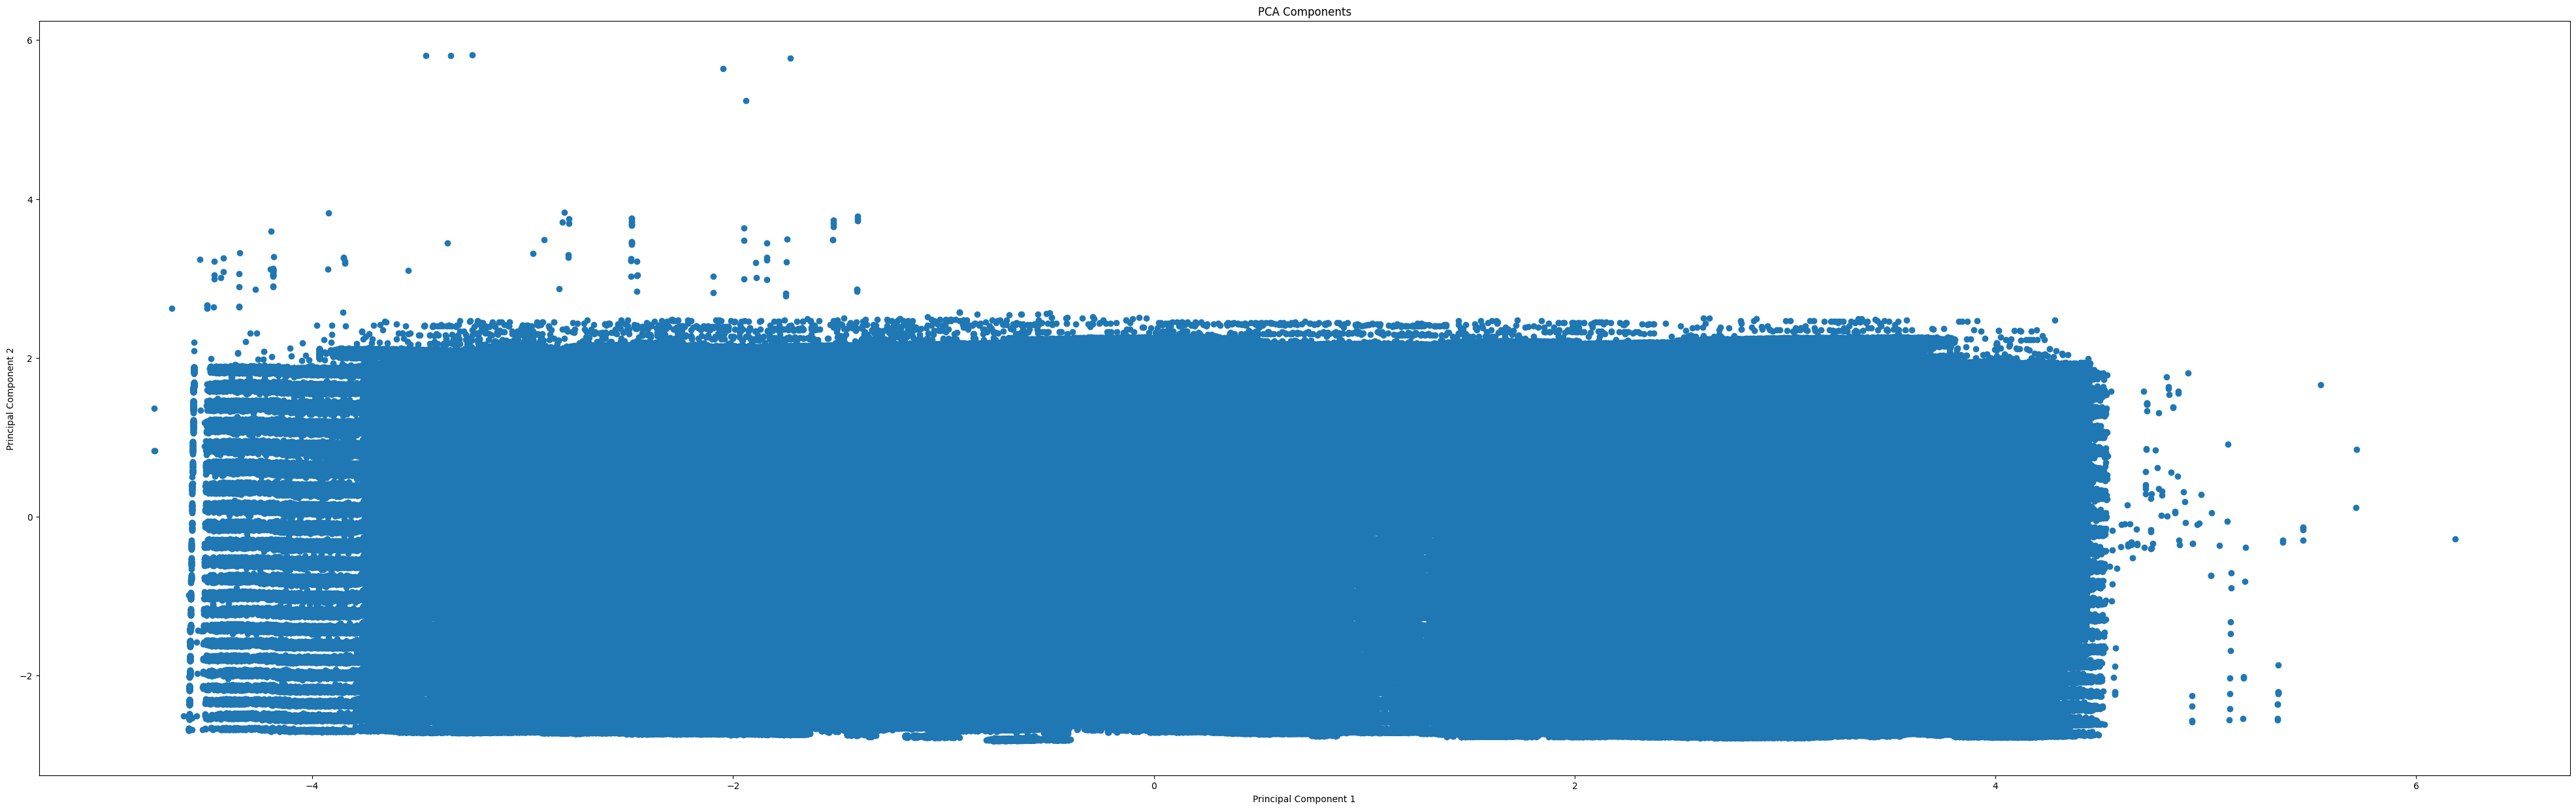

Columns after preprocessing:
 Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [ ]:
# Plots for comparison of data before and after preprocessing
# Before Preprocessing
plt.figure(figsize=(12, 6))
sns.histplot(df['Primary Type'], bins=20)
plt.title('Distribution of Primary Crime Types (Before Preprocessing)')
plt.xticks(rotation=90)
plt.show()

# After Preprocessing
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Primary Type'], bins=20)
plt.title('Distribution of Primary Crime Types (After Preprocessing)')
plt.xticks(rotation=90)
plt.show()

# Visualize PCA components
plt.figure(figsize=(50, 15))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1])
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

